In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('/content/airbnb_sales_trends.csv')

In [4]:
df['Check_In_Date'] = pd.to_datetime(df['Check_In_Date'])
df['Date_Booked'] = pd.to_datetime(df['Date_Booked'])
df['Check_Out_Date'] = pd.to_datetime(df['Check_Out_Date'])

In [5]:
df['MonthYear'] = df['Check_In_Date'].dt.strftime('%Y-%m')

In [6]:
confirmed_df = df[df['Booking_Status'] == 'Confirmed']

In [7]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking_ID           5000 non-null   int64         
 1   Listing_ID           5000 non-null   int64         
 2   Date_Booked          5000 non-null   datetime64[ns]
 3   Check_In_Date        5000 non-null   datetime64[ns]
 4   Check_Out_Date       5000 non-null   datetime64[ns]
 5   Price_Per_Night      5000 non-null   float64       
 6   Number_of_Nights     5000 non-null   int64         
 7   Total_Booking_Cost   5000 non-null   float64       
 8   Room_Type            5000 non-null   object        
 9   Neighborhood         5000 non-null   object        
 10  Guest_Count          5000 non-null   int64         
 11  Host_ID              5000 non-null   int64         
 12  Cancellation_Policy  5000 non-null   object        
 13  Booking_Status     

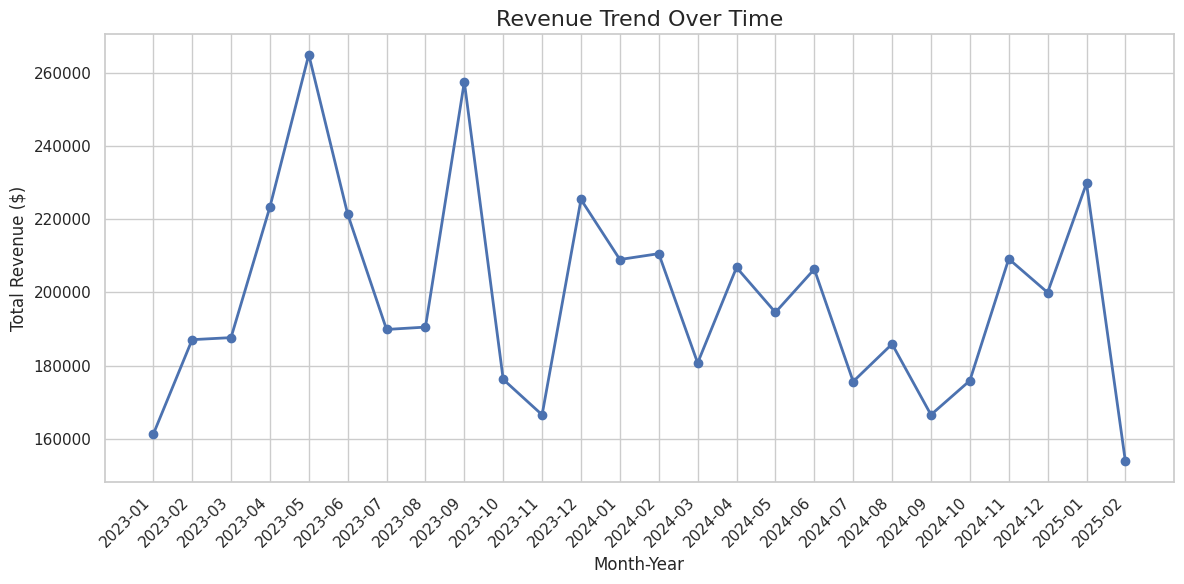

In [8]:
# --- Visualization 1: Revenue Trend Over Time (Line Plot) ---
revenue_by_month = confirmed_df.groupby('MonthYear')['Total_Booking_Cost'].sum()
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month.index, revenue_by_month.values, marker='o', color='b', linewidth=2)
plt.title('Revenue Trend Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-9-8366e635c437>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='Blues_d')


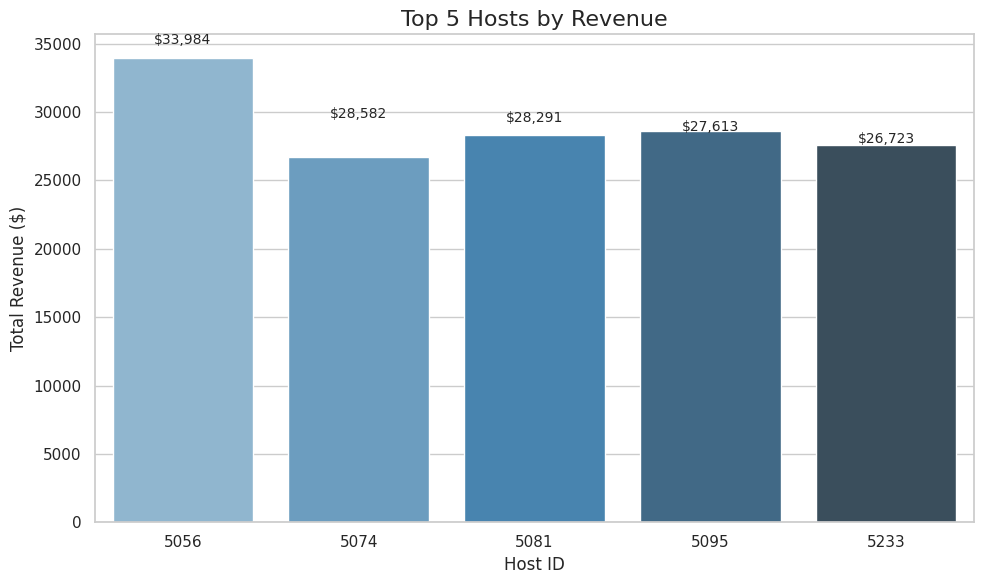

In [9]:
# --- Visualization 2: Top 5 Hosts by Revenue (Bar Plot) ---
top_hosts = confirmed_df.groupby('Host_ID')['Total_Booking_Cost'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='Blues_d')
plt.title('Top 5 Hosts by Revenue', fontsize=16)
plt.xlabel('Host ID', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
for i, v in enumerate(top_hosts.values):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

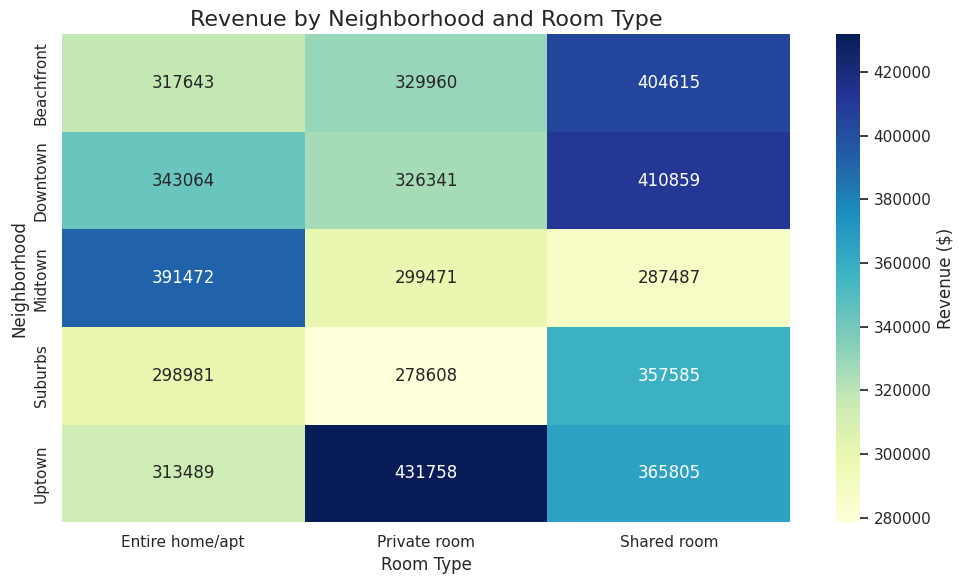

In [10]:
# --- Visualization 3: Revenue by Neighborhood and Room Type (Heatmap) ---
heatmap_data = confirmed_df.pivot_table(values='Total_Booking_Cost', index='Neighborhood',
                                        columns='Room_Type', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Revenue ($)'})
plt.title('Revenue by Neighborhood and Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-11-a80ea117d81d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='Greens_d')


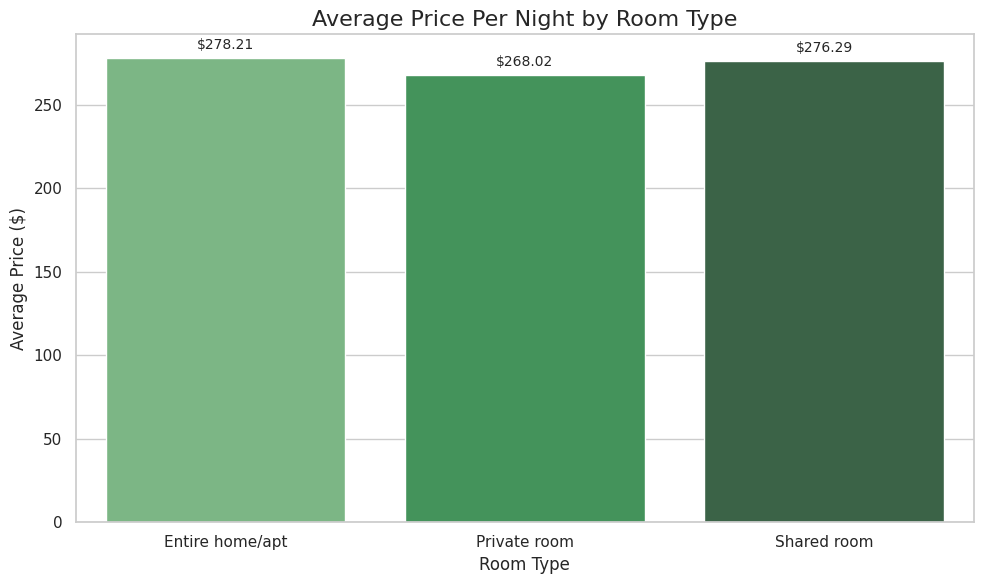

In [11]:
# --- Visualization 4: Average Price Per Night by Room Type (Bar Plot) ---
avg_price = confirmed_df.groupby('Room_Type')['Price_Per_Night'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='Greens_d')
plt.title('Average Price Per Night by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
for i, v in enumerate(avg_price.values):
    plt.text(i, v + 5, f'${v:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

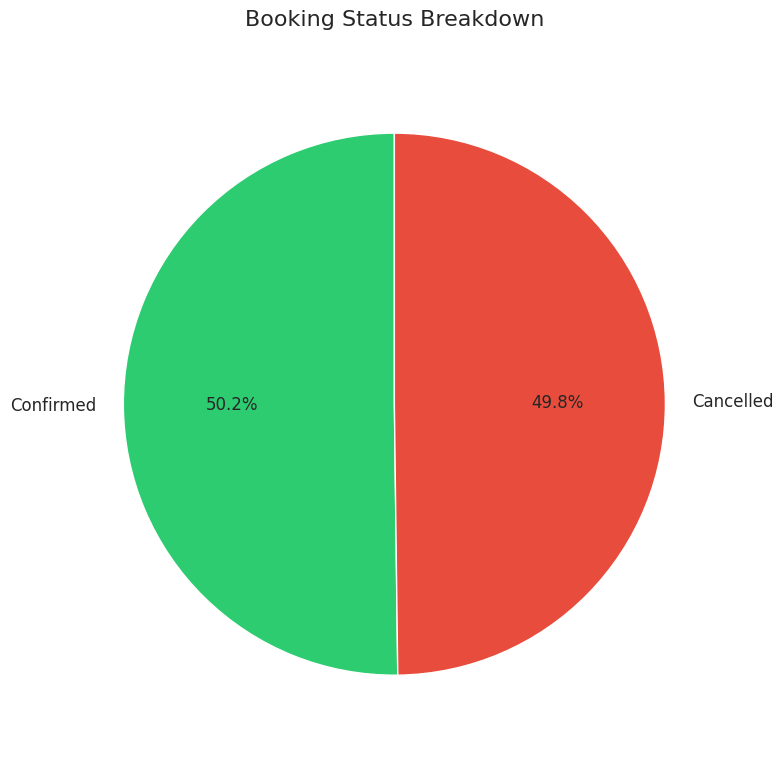

In [12]:
# --- Visualization 5: Booking Status Breakdown (Pie Chart) ---
booking_status = df['Booking_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(booking_status, labels=booking_status.index, autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
        startangle=90, textprops={'fontsize': 12})
plt.title('Booking Status Breakdown', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-14-1c36f51801c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Room_Type', y='Price_Per_Night', data=confirmed_df, palette='Set2')


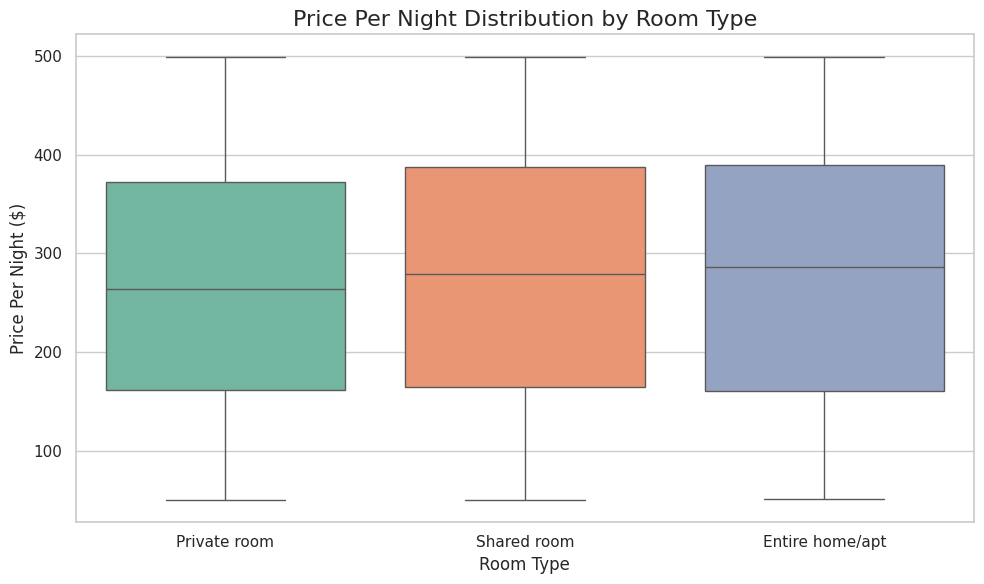

In [14]:
# --- Visualization 6: Price Per Night Distribution by Room Type (Box Plot) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Room_Type', y='Price_Per_Night', data=confirmed_df, palette='Set2')
plt.title('Price Per Night Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price Per Night ($)', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-15-ada708709fce>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cancel_rate = df.groupby('Cancellation_Policy').apply(
<ipython-input-15-ada708709fce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='Reds_d')


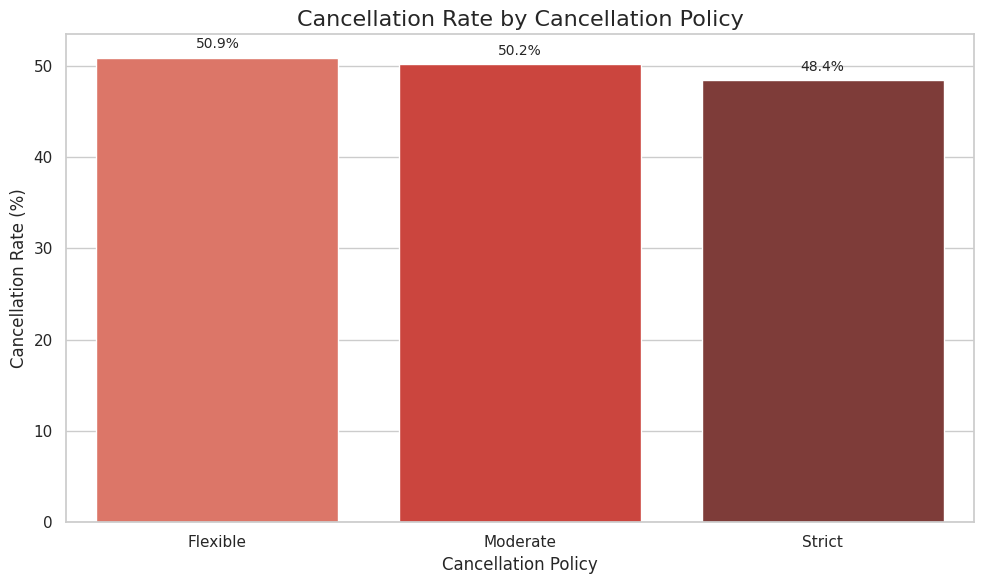

In [15]:
# --- Visualization 7: Cancellation Rate by Cancellation Policy (Bar Plot) ---
cancel_rate = df.groupby('Cancellation_Policy').apply(
    lambda x: (x['Booking_Status'] == 'Cancelled').mean() * 100
)
plt.figure(figsize=(10, 6))
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='Reds_d')
plt.title('Cancellation Rate by Cancellation Policy', fontsize=16)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
for i, v in enumerate(cancel_rate.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

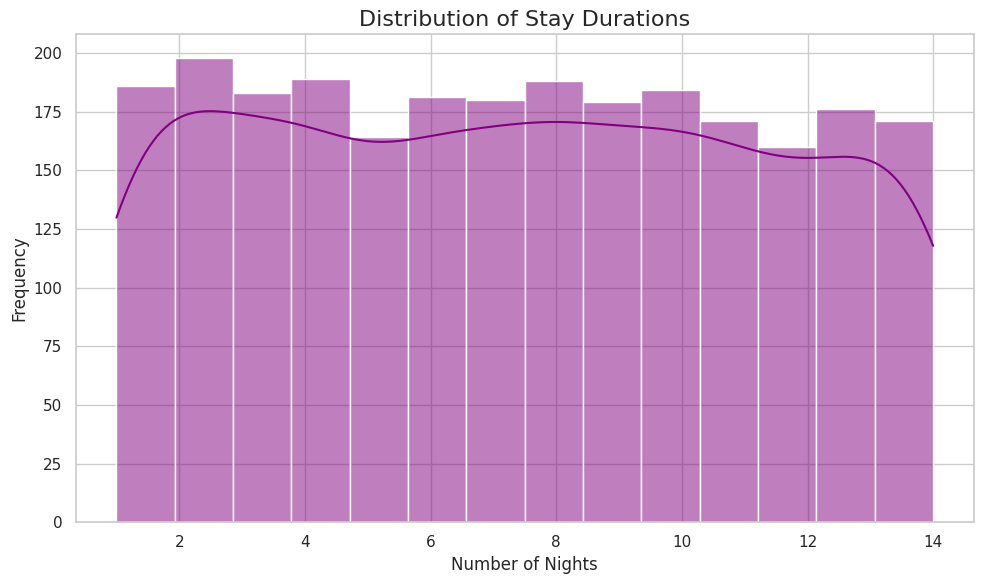

In [16]:
# --- Visualization 8: Distribution of Stay Durations (Histogram) ---
plt.figure(figsize=(10, 6))
sns.histplot(confirmed_df['Number_of_Nights'], bins=14, color='purple', kde=True)
plt.title('Distribution of Stay Durations', fontsize=16)
plt.xlabel('Number of Nights', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

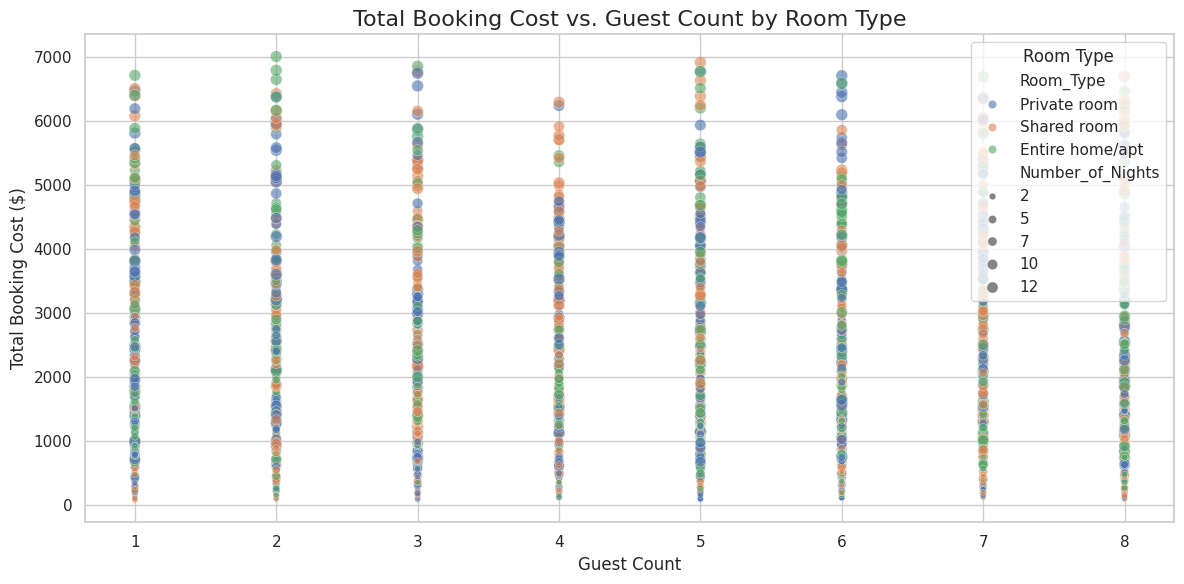

In [17]:
# --- Visualization 9: Total Booking Cost vs. Guest Count by Room Type (Scatter Plot) ---
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Guest_Count', y='Total_Booking_Cost', hue='Room_Type', size='Number_of_Nights',
                data=confirmed_df, palette='deep', alpha=0.6)
plt.title('Total Booking Cost vs. Guest Count by Room Type', fontsize=16)
plt.xlabel('Guest Count', fontsize=12)
plt.ylabel('Total Booking Cost ($)', fontsize=12)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

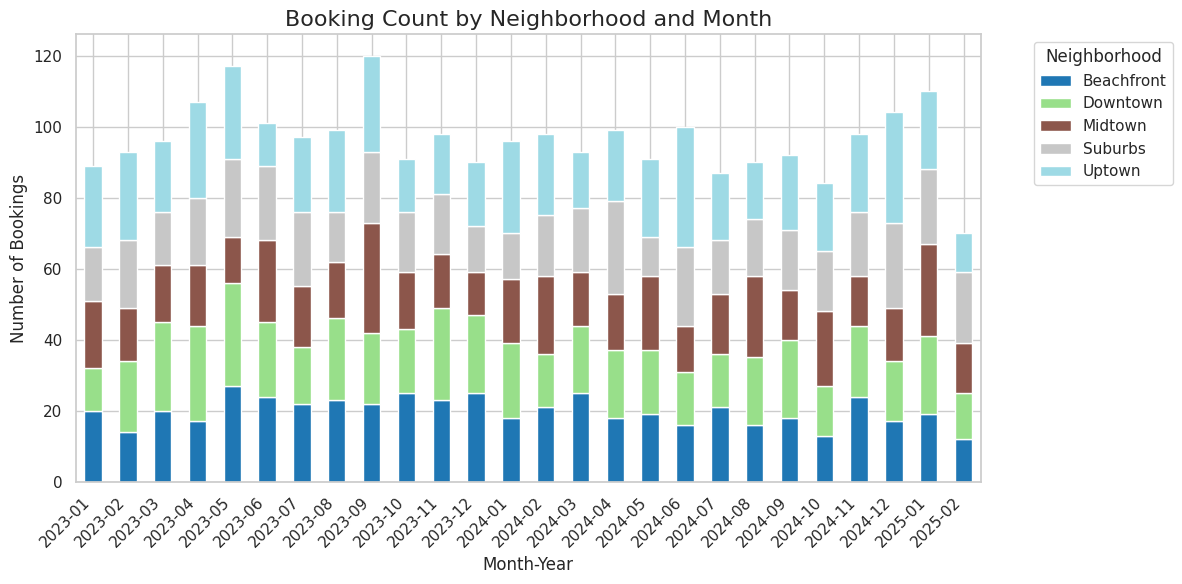

In [18]:
# --- Visualization 10: Booking Count by Neighborhood and Month (Stacked Bar Plot) ---
stacked_data = confirmed_df.pivot_table(index='MonthYear', columns='Neighborhood',
                                        values='Booking_ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 6))
stacked_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title('Booking Count by Neighborhood and Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# --- Additional Insights ---
print("\nKey Insights:")
print(f"Total Revenue (Confirmed): ${confirmed_df['Total_Booking_Cost'].sum():,.2f}")
print(f"Average Stay Duration: {confirmed_df['Number_of_Nights'].mean():.2f} nights")
print(f"Cancellation Rate: {(len(df[df['Booking_Status'] == 'Cancelled']) / len(df)) * 100:.2f}%")


Key Insights:
Total Revenue (Confirmed): $5,157,136.08
Average Stay Duration: 7.37 nights
Cancellation Rate: 49.80%
